# Time Series Analysis and Forecasting

This guide demonstrates how to perform time series analysis and forecasting on the Ontario retirement house investment dataset, focusing on features like **Property Prices** or **Occupancy Rates** over time.

## Steps

1. **Preparation**: Format the dataset for time series analysis.
2. **Exploratory Data Analysis**: Visualize time series data.
3. **Model Selection**: Use Facebook Prophet for forecasting.
4. **Forecasting**: Predict future values of property prices or occupancy rates.

## Step 1: Preparation

First, ensure the dataset is set up correctly for time series analysis.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('..//Data/ontario_retirement_house_investment_data.csv')


## Missing value check

In [26]:
if df['Date'].isnull().any():
    raise ValueError("There are missing values in the 'Date' column. Please clean the data.")

### Ensure data is in Date format

In [27]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if there are any missing values in the 'Date' column


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Filter for one city, for example 'London'
df_london = df[df['City'] == 'London']

# Display the first few rows to ensure it's set up correctly
df_london.head()


,City,Property_Price,Occupancy_Rate,Inflation_Rate,Population_Age_65+,Population_Age_65_Growth,Median_Age,Income_Level,Proximity_to_Healthcare,Walkability_Score,Crime_Rate,Property_Tax_Rate,Public_Transport_Access,Government_Incentives,Environmental_Quality,Senior_Living_Vacancy_Rate,Mental_Health_Programs,Memory_Care_Availability
Date,,,,,,,,,,,,,,,,,,
2010-01-01,London,848703,71,2.68,45565,2.13,42,76100,3,64,10,1,1,1,91.733793,12.690232,1,1
2010-02-01,London,986957,93,2.74,44538,2.77,47,38783,3,52,7,1,1,1,82.506671,5.833026,0,0
2010-03-01,London,943318,83,1.61,33963,0.70,42,59665,9,84,6,2,0,1,70.895383,13.320621,0,1
2010-04-01,London,934355,72,3.64,60330,1.96,44,40350,7,88,1,2,1,1,75.354998,9.718430,1,1
2010-05-01,London,860795,74,2.93,50283,2.65,46,57408,4,70,9,2,0,1,78.870686,12.438621,0,1


### Let's explore data as Occupancy rate and Property prices over time for London

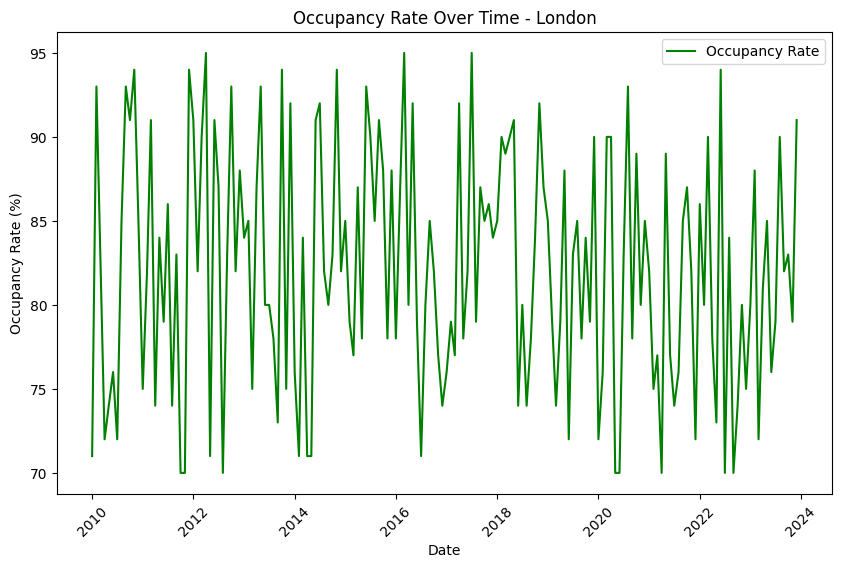

In [28]:

# Plot occupancy rate over time for London
plt.figure(figsize=(10, 6))
plt.plot(df_london.index, df_london['Occupancy_Rate'], label='Occupancy Rate', color='green')
plt.title('Occupancy Rate Over Time - London')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


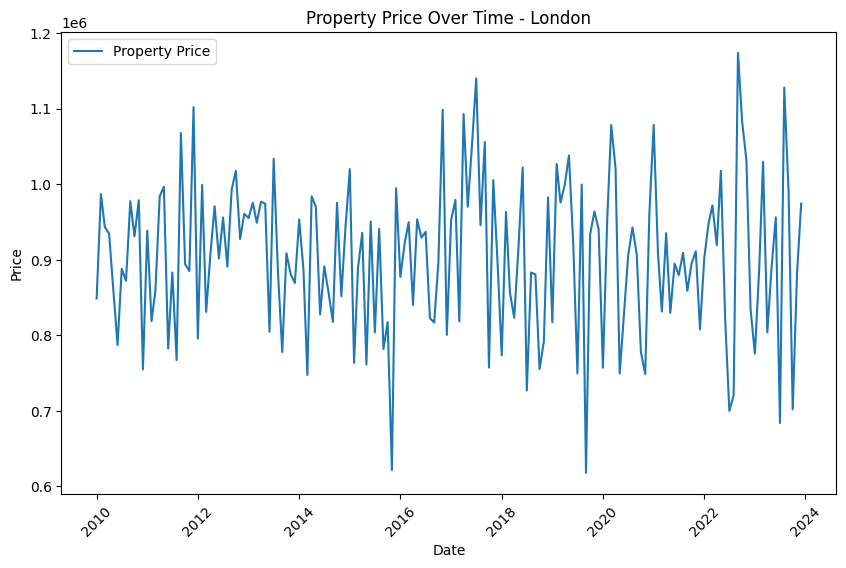

In [29]:
# Plot property prices over time for London
plt.figure(figsize=(10, 6))
plt.plot(df_london.index, df_london['Property_Price'], label='Property Price')
plt.title('Property Price Over Time - London')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Decomposition of Time Series

We will use seasonal decomposition to split the time series into trend, seasonality, and residuals using Python's ***statsmodels*** library.

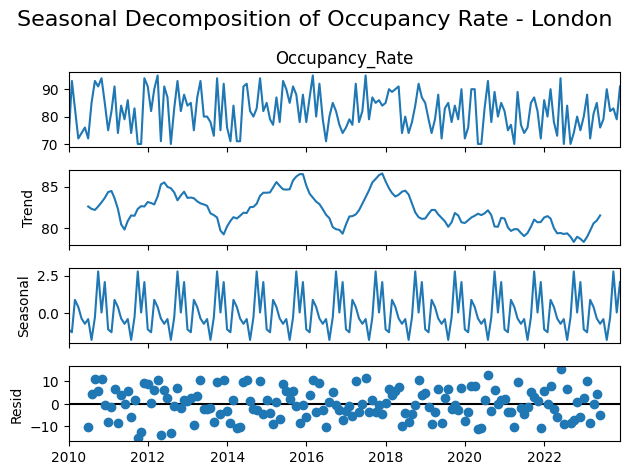

In [30]:
# Perform seasonal decomposition on the Property_Price series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_london['Occupancy_Rate'], model='additive', period=12)

# Plot the decomposition
fig=result.plot()
fig.suptitle('Seasonal Decomposition of Occupancy Rate - London', fontsize=16)
plt.tight_layout()
plt.show()


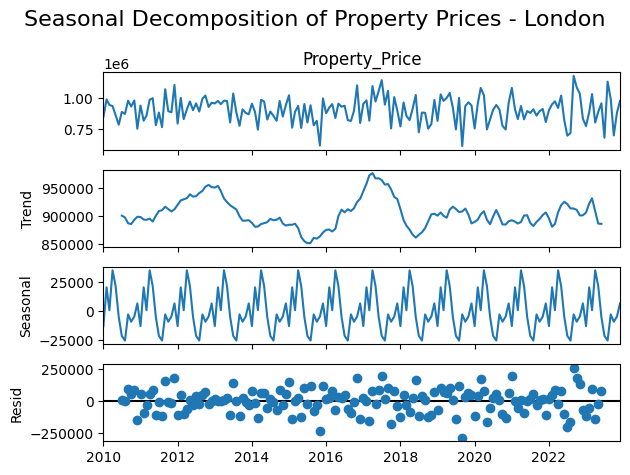

In [31]:
# Perform seasonal decomposition on the Property_Price series London
result = seasonal_decompose(df_london['Property_Price'], model='additive', period=12)

# Plot the decomposition
fig=result.plot()
fig.suptitle('Seasonal Decomposition of Property Prices - London', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Zekiye\AppData\Local\Temp\ipykernel_10640\1795910928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london['Month'] = df_london.index.month


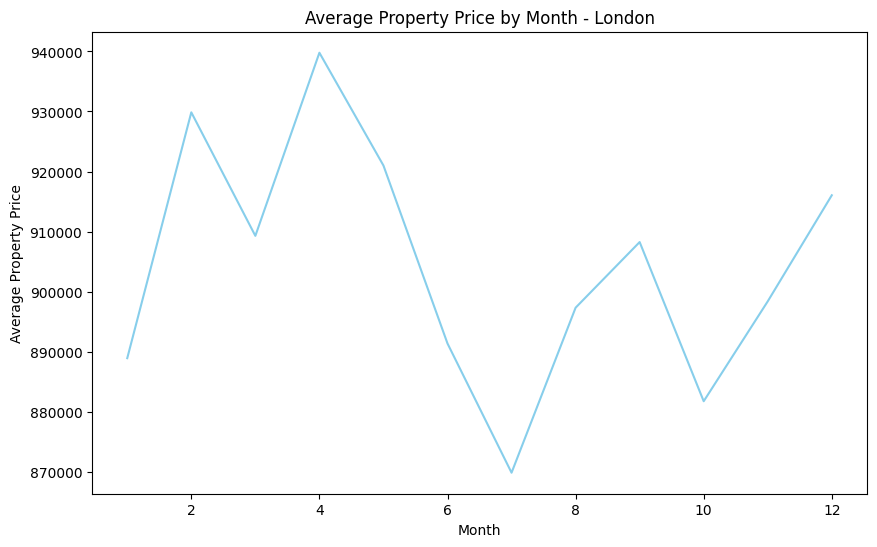

In [32]:
# Extract month from the date for seasonality analysis
df_london['Month'] = df_london.index.month

# Calculate the average property price by month
monthly_avg = df_london.groupby('Month')['Property_Price'].mean()

# Plot the seasonal monthly pattern
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', color='skyblue')
plt.title('Average Property Price by Month - London')
plt.xlabel('Month')
plt.ylabel('Average Property Price')
plt.xticks(rotation=0)
plt.show()

## Forecasting with Facebook Prophet

In [33]:
from prophet import Prophet

# Prepare data for Prophet - Prophet expects columns 'ds' and 'y'
df_prophet = df_london[['Property_Price']].reset_index()
df_prophet.columns = ['ds', 'y']  # 'ds' is the date, 'y' is the value we want to forecast

# Initialize Prophet model
model = Prophet()
model.fit(df_prophet)

12:49:23 - cmdstanpy - INFO - Chain [1] start processing
12:49:23 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


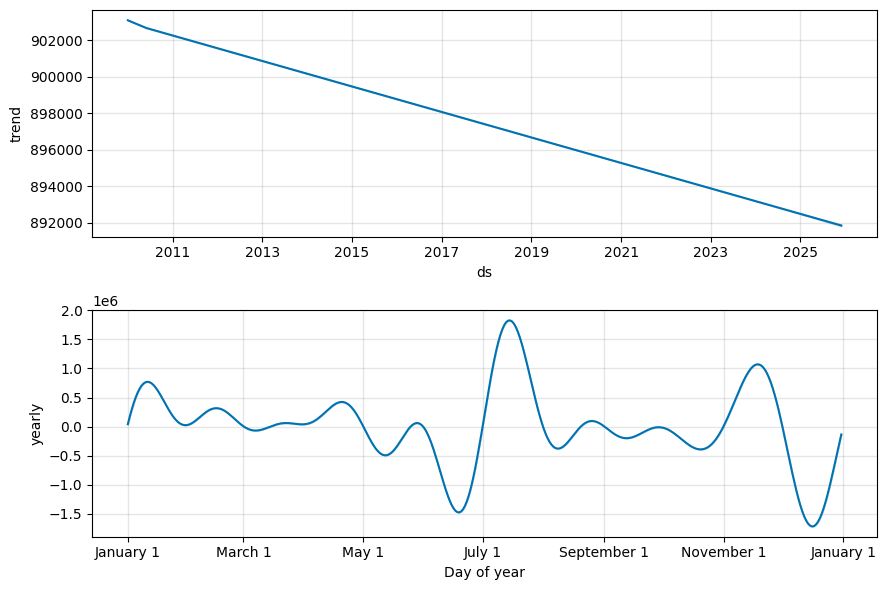

In [34]:
# Create future dataframe to see forecasts and trends
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

# Plot the trend and seasonality
model.plot_components(forecast)
plt.show()

### Forecasting for the next 12 months

c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


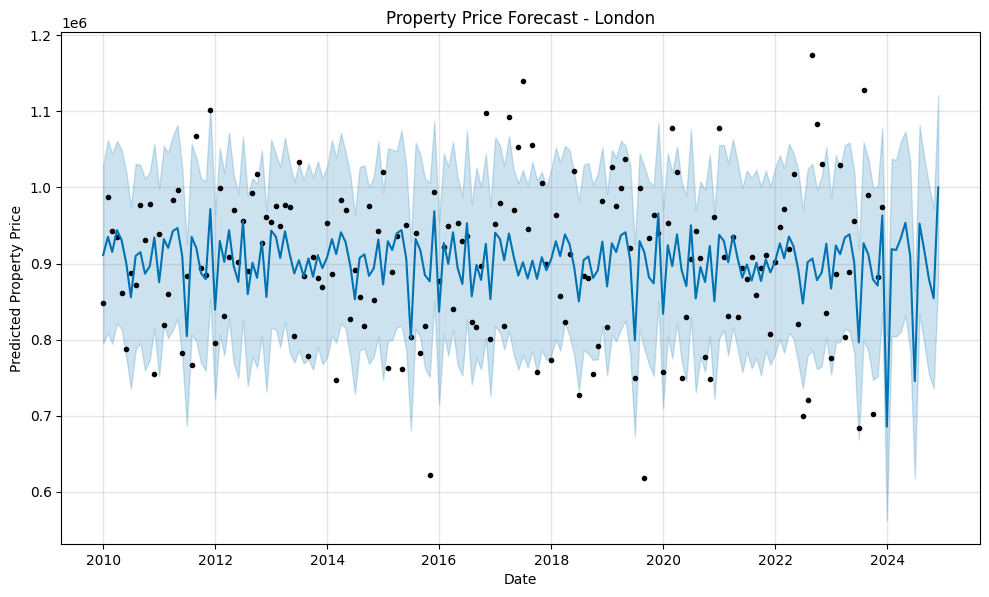

In [35]:
# Create a dataframe for future predictions (12 months into the future)
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future property prices
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Property Price Forecast - London')
plt.xlabel('Date')
plt.ylabel('Predicted Property Price')
plt.show()

### Now it's time to look performance of this forecast results

### Compare Forecast to Actual Values

12:49:24 - cmdstanpy - INFO - Chain [1] start processing
12:49:24 - cmdstanpy - INFO - Chain [1] done processing


             Actual     Forecasted
ds                                
2023-01-01   775664  896242.751883
2023-02-01   886668  931713.128534
2023-03-01  1029382  902753.331649
2023-04-01   803955  951680.177855
2023-05-01   888865  923374.925352
2023-06-01   955966  886169.803270
2023-07-01   683894  882886.157177
2023-08-01  1127769  880999.915644
2023-09-01   990111  902270.576498
2023-10-01   702068  896200.834424
2023-11-01   881834  898256.457241
2023-12-01   974229  912811.490106


c:\Users\Zekiye\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


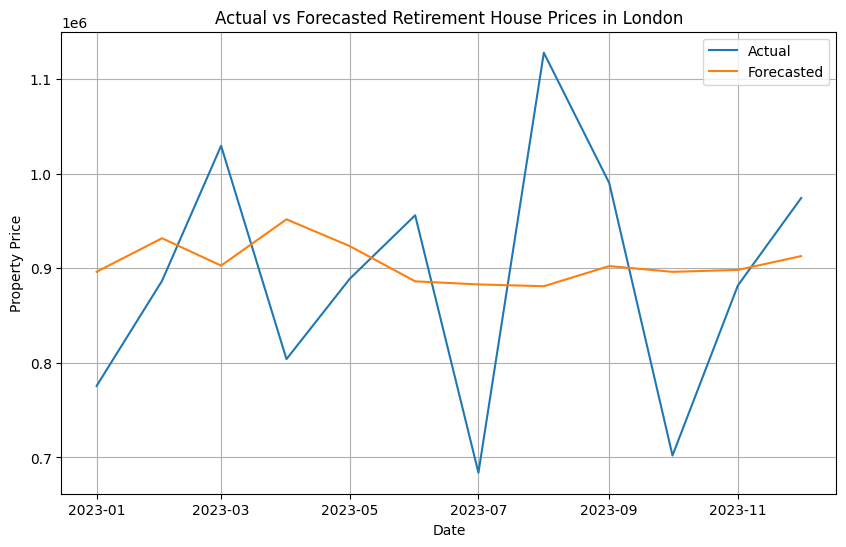

In [36]:
data = pd.read_csv('../Data/ontario_retirement_house_investment_data.csv')

# Filter for London data
london_data = data[data['City'] == 'London']

# Prepare the data for Prophet
london_prophet_data = london_data[['Date', 'Property_Price']].rename(columns={'Date': 'ds', 'Property_Price': 'y'})
london_prophet_data['ds'] = pd.to_datetime(london_prophet_data['ds'])

# Split the data into training and test sets, keeping the last 12 months for testing
train_data = london_prophet_data.iloc[:-12]  # All but the last 12 months
test_data = london_prophet_data.iloc[-12:]   # Last 12 months

# Create and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)

# Make future dataframe for prediction, including the next 12 months
future_test = model.make_future_dataframe(periods=12, freq='M')

# Predict the future values (which includes the test set period)
forecast_test = model.predict(future_test)

# Extract only the forecasted data for the test period (last 12 months)
forecast_test_filtered = forecast_test[-12:]

# Create a comparison dataframe
comparison = pd.DataFrame({
    'Actual': test_data['y'].values,
    'Forecasted': forecast_test_filtered['yhat'].values
}, index=test_data['ds'])

# Print the comparison
print(comparison)

# Plot the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual')
plt.plot(test_data['ds'], forecast_test_filtered['yhat'], label='Forecasted')
plt.legend()
plt.title('Actual vs Forecasted Retirement House Prices in London')
plt.xlabel('Date')
plt.ylabel('Property Price')
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
# Calculate MAE and RMSE
mae = mean_absolute_error(test_data['y'], forecast_test_filtered['yhat'])
rmse = root_mean_squared_error(test_data['y'], forecast_test_filtered['yhat'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 112488.192941453
Root Mean Squared Error (RMSE): 132421.81828475723


### This is relatively a large error, so we have two options here either we can fine tune the prophet  model.
### Or we can try other models like SARIMA and LSTM and compare the results. Before dive into one model, it is always wise to go to comparison.
### Let's first apply the SARIMA model.

## This model will be in a different file, please see the notebooks.